# Wrangle Twitter Data
## Introduction
In this project data is gathered from three different sources: twitter data archive, udacity server, and twitter API. This gathered data is then merged together and accessed for cleaning. Necessary cleaning operations are performed. Finally exploratory data visualizations are produced to explore the cleaned data.
- [Gather Data](#Gather)
- [Access Data](#Access)
- [Clean Data](#Clean)
- [Exploratory Data Visualization](#Visualize)


In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import re
import datetime as dt
import matplotlib.pyplot as plt
% matplotlib inline 

In [2]:
#To display full text of twitter text expand colwidth of jupyter notebook
pd.options.display.max_colwidth=150

<a id='Gather'></a>
### 1. Gather Data

Import twitter-archive-enhanced.csv data

In [3]:
#Import data from twitter-archive-enhanced.csv file
twitter_data=pd.read_csv('twitter-archive-enhanced.csv')
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Import image_prediction.tsv file from udacity server using requests library

In [4]:
#Read file from udacity server using requests library
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

In [5]:
#Download the server file and save in a folder named Server_file, if folder not present create folder
foldername='Server_file'
if not os.path.exists(foldername):
    os.makedirs(foldername)
with open(os.path.join(foldername,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)
    
#Print folder directory
os.listdir(foldername)

['image-predictions.tsv']

In [6]:
#Read the image-predictions.tsv file and save as a dataframe
server_data=pd.read_csv('./Server_file/image-predictions.tsv',delimiter='\t')
server_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Import retweet status data from twitter using tweepy api and access tokens

In [7]:
#Acces the twitter data using access token and credentials
access_token = 'My access token'
access_secret = 'My access secret'
consumer_key = 'My consumer key'
consumer_secret = 'My consumer sercet'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
#Save the twitter_archive tweet id column as a list- id_of_tweet
id_of_tweet=twitter_data['tweet_id']

Using tweepy api get status for each tweet_id and store its corresponding retweet_count, favorite_count, retweet-status and image url in a tweet_jason.txt file

In [9]:
#Please wait processing of this block takes 15mins

with open("tweet_json.txt", "w") as txtfile:
    txtfile.write('tweet_id retweet_count favorite_count retweeted image_url media_type\n')
    for tweet_id in id_of_tweet:
        try:
            tweet = api.get_status(str(tweet_id),tweet_mode='extended')
        except tweepy.TweepError:
            retweeted="No_data"
            retweet_count="No_data"
            favorites_count="No_data"
            image="No_data"
            media_type="No_data"
        else: # only gets executed if the try clause did not fail  
            retweeted=tweet.retweeted
            retweet_count = tweet.retweet_count
            favorites_count = tweet.favorite_count
            try: 
                image=tweet.entities['media'][0]['url']
                media_type=tweet.entities['media'][0]['type']
            except KeyError:
                image="No_image"
                media_type="No_media"
            txtfile.write(str(tweet_id)+' '+str(retweet_count)+' '+str(favorites_count)+' '+str(retweeted)+' '+str(image)+' '+str(media_type)+'\n')

No handlers could be found for logger "tweepy.binder"


Read tweet_json.txt file and print few rows

In [10]:
api_data=pd.read_csv('tweet_json.txt',sep=' ')
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,image_url,media_type
0,892420643555336193,8316,38023,False,https://t.co/MgUWQ76dJU,photo
1,892177421306343426,6143,32647,False,https://t.co/0Xxu71qeIV,photo
2,891815181378084864,4067,24570,False,https://t.co/wUnZnhtVJB,photo
3,891689557279858688,8459,41377,False,https://t.co/tD36da7qLQ,photo
4,891327558926688256,9159,39555,False,https://t.co/AtUZn91f7f,photo


<a id='Access'></a>
### 2. Access Data

#### Visual accessment:

1.) After viewing twitter archive data in excel it was observed that the timestamp column has two variables: date and time, as two variables are in single column it is a tidyness issue.


2.) Also, the text column in twitter archive data has three varibles: tweet text, rating, and image url. As three variables are in single column this is also a tidyness issue.

3.) Numerator ratings and ratings in twitter text do not match, eg on index 46 rating is 13.5 whereas it is 13 in rating_numerator

#### Programming accessment


In [11]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

4.) Datatype of rating_numerator should be float instead of int64

In [13]:
twitter_data['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

5.) As can be seen from above the name is none for 745 tweets and a for 75. This is inaccurate information

In [14]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


6.) As can be seen from above that the maximum rating_denominator is 170 and minimum is 0, whereas all denominators should be consistent as 10. This is an accuracy issue, hence an Quality issue

7.) Also, maximum rating_numerator is 1776 which is clearly a mistake. This is also an Quality issue.

In [15]:
server_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


8.) If observed the server data head, there are columns p1, p2, p3 which convey the same meaning dog breed. This three columns can be converted into one column by comparing their corresponding p_conf values and p_dog if True.

In [16]:
server_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


9.) As can be seen from above tweet_id datatype is int64, whereas it should be object, because they are not numeric. This is an Quality issue

In [17]:
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,image_url,media_type
0,892420643555336193,8316,38023,False,https://t.co/MgUWQ76dJU,photo
1,892177421306343426,6143,32647,False,https://t.co/0Xxu71qeIV,photo
2,891815181378084864,4067,24570,False,https://t.co/wUnZnhtVJB,photo
3,891689557279858688,8459,41377,False,https://t.co/tD36da7qLQ,photo
4,891327558926688256,9159,39555,False,https://t.co/AtUZn91f7f,photo


In [18]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
retweeted         2340 non-null bool
image_url         2340 non-null object
media_type        2340 non-null object
dtypes: bool(1), int64(3), object(2)
memory usage: 93.8+ KB


10.) The data collected from three different sources needs to merged to a single dataframe for ease of analysis

11.) As can be seen from above there are 2340 non null values, whereas 2075 non null in server data and, 2356 in archive data. So there are some missing values and these rows have to be deleted before using combined data for analysis

In [19]:
api_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2928.603846,7960.497436
std,6.832564e+16,4933.771908,12328.785609
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,587.750000,1371.750000
50%,7.186224e+17,1367.500000,3461.500000
75%,7.986954e+17,3412.750000,9740.000000
max,8.924206e+17,83635.000000,164248.000000


In [20]:
api_data['media_type'].value_counts()

photo       2067
No_media     273
Name: media_type, dtype: int64

12.) As the requirement of the project we only have to consider the tweets that have media photo. And from api_data we can observe that 273 tweets do not have images and so we should not consider them in our analysis

In [21]:
api_data['retweeted'].value_counts()

False    2340
Name: retweeted, dtype: int64

As can be seen from above no tweets from api_data are retweets

#### So the above accessed issues can be listed as:

#### A.) Tidyness issues:
#### 1. The twitter_data dataframe 'text' column has three variables: tweet text, rating, and image url. Seperate these as individual columns
#### 2. Date and time are stored in single column. Seperate these two as individual columns- Date and Time

#### 3. In image_predictions.tsv file there are three columns p1, p2, p3 that represent the same meaning dog breed and can be reduced to one

#### B.) Quality issues:

#### 1. Merge twitter archive data and data collected from twitter api

#### 2. Merge combined_data dataframe (twitter achrive and api_data) with data gathered from udacity server (server_data dataframe)

#### 3. Change the datatype of rating_numerator to float

#### 4. Change the datatype of tweet_id from int64 to object

#### 5. From data select only those tweets that have images.

#### 6. Find where the rating_denominator is not 10 and update it to 10

#### 7. Consider only those tweets whose rating_numerator is <=15

#### 8.  Find where the twitter text ratings and given ratings in twitter-archive do not match. Update rating_numerator to the ratings of twitter text

#### 9.  Select columns of interest. Delete unwanted variables

#### 10. Delete missing values from data dataframe

#### 11. The name column value counts has none for 745 tweets and a for 75. This is inaccurate information and should be deleted

<a id='Clean'></a>
### 3. Clean Data

#### Make copies of dataframes

In [22]:
twitter_data_copy=twitter_data.copy()
server_data_copy=server_data.copy()
api_data_copy=api_data.copy()

### 3.1 Tidy Issues
#### 3.1.1.

#### Define: 
The twitter_data dataframe 'text' column has three variables: tweet text, rating, and image url.  Separate these three variables as individual columns- text, text_rating, image_url

#### Code:

In [23]:
#Separate the variables into three independent lists
text=[]
number=[]
url=[]
for tweets in twitter_data_copy['text']:
    t=re.sub(r"\d\S+","",tweets)
    t=re.sub(r'https?:\S+', '', t)
    text.append(t)
    #n=[float(s) for s in re.findall(r'\b\d+\b',tweets)]
    n=re.findall(r"(\d+\.?\d*)/10",tweets)
    number.append(n)
    u = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweets) 
    url.append(u)

#Add these lists to twitter_data_copy dataframe as individual columns
twitter_data_copy['twitter_text']=text
twitter_data_copy['text_rating']=number
twitter_data_copy['image_url']=url

#### Test:

In [24]:
twitter_data_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,twitter_text,text_rating,image_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,[13],[https://t.co/MgUWQ76dJU]
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",[13],[https://t.co/0Xxu71qeIV]
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,[12],[https://t.co/wUnZnhtVJB]
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal. happens to the best of us,[13],[https://t.co/tD36da7qLQ]
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",[12],[https://t.co/AtUZn91f7f]


The twitter archive rating extracted from text is in string format. Update it to float

In [25]:
#new=list(itertools.chain(*twitter_data_copy['text_rating']))
new=[]
for i in range(0,twitter_data_copy.shape[0]):
    try:
        a=float(twitter_data_copy['text_rating'][i][0])
    except IndexError:
        a=0
    new.append(a)
twitter_data_copy['text_rating']=new
twitter_data_copy['text_rating'][:5]

0    13.0
1    13.0
2    12.0
3    13.0
4    12.0
Name: text_rating, dtype: float64

#### 3.1.2. 
#### Define: 
The twitter_data 'timestamp' column has two variables in single column: date and time. Separate these two variables and save them as individual columns date and time in twitter_data
#### Code:

In [26]:
#Separate date and time as individual columns from timestamp column
date = pd.to_datetime(twitter_data_copy['timestamp'], format="%Y-%m-%d  %H:%M:%S +0000")
twitter_data_copy['date']= date.dt.date
twitter_data_copy['time'] = date.dt.time

#### Test

In [27]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
twitter_text                  23

#### 3.1.3. 
#### Define: 
From p1, p2, p3 create one single column selecting from p1, p2, p3 whose corresponding p_conf is highest and p_dog is True
#### Code:

In [28]:
#If Predicted dog breed is not a dog, that is, p1_dog=False, replace its corresponding p_conf value to zero. 
#So we will only consider those results that are dogs
server_data_copy.index=range(len(server_data_copy.tweet_id))
for i in range(0,server_data_copy.shape[0]):
    if server_data_copy['p1_dog'][i]==False:
        server_data_copy.loc[i,'p1_conf']=0
    if server_data_copy['p2_dog'][i]==False:
        server_data_copy.loc[i,'p2_conf']=0
    if server_data_copy['p3_dog'][i]==False:
        server_data_copy.loc[i,'p3_conf']=0       

In [29]:
dog=[]
p_conf=[]
dog_type=[]
server_data_copy.index=range(len(server_data_copy.tweet_id))
for i in range(0,server_data_copy.shape[0]):
    if ((server_data_copy['p1_conf'][i]>server_data_copy['p2_conf'][i])&(server_data_copy['p1_conf'][i]>server_data_copy['p3_conf'][i])):
        p=server_data_copy['p1_conf'][i]
        breed=server_data_copy['p1'][i]
        types=server_data_copy['p1_dog'][i]
    elif ((server_data_copy['p2_conf'][i]>server_data_copy['p1_conf'][i])&(server_data_copy['p2_conf'][i]>server_data_copy['p3_conf'][i])):
        p=server_data_copy['p2_conf'][i]
        breed=server_data_copy['p2'][i]
        types=server_data_copy['p2_dog'][i]
    elif ((server_data_copy['p3_conf'][i]>server_data_copy['p2_conf'][i])&(server_data_copy['p3_conf'][i]>server_data_copy['p1_conf'][i])):
        p=server_data_copy['p3_conf'][i]
        breed=server_data_copy['p3'][i]
        types=server_data_copy['p3_dog'][i]
    elif (server_data_copy['p1_conf'][i]==server_data_copy['p2_conf'][i]==server_data_copy['p3_conf'][i]==0):
        i=i+1
    dog.append(breed)
    p_conf.append(p)
    dog_type.append(types)
server_data_copy['dog_type']=dog
server_data_copy['p_conf']=p_conf
server_data_copy['is_dog']=dog_type
server_data_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,p_conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311,True


#### Test:

In [30]:
server_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dog_type    2075 non-null object
p_conf      2075 non-null float64
is_dog      2075 non-null bool
dtypes: bool(4), float64(4), int64(2), object(5)
memory usage: 282.6+ KB


### 3.2 Quality Issues

#### 3.2.1

#### Define:
Merge twitter archive data and api_data dataframes on tweet_id column

#### Code:

In [31]:
#Merge twitter archive and api_data dataframes
combined_data=twitter_data_copy.join(api_data_copy.set_index('tweet_id'),on='tweet_id',how='outer', lsuffix='_left', rsuffix='_right')

#### Test:

In [32]:
combined_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,twitter_text,text_rating,image_url_left,date,time,retweet_count,favorite_count,retweeted,image_url_right,media_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,13.0,[https://t.co/MgUWQ76dJU],2017-08-01,16:23:56,8316.0,38023.0,False,https://t.co/MgUWQ76dJU,photo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",13.0,[https://t.co/0Xxu71qeIV],2017-08-01,00:17:27,6143.0,32647.0,False,https://t.co/0Xxu71qeIV,photo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,12.0,[https://t.co/wUnZnhtVJB],2017-07-31,00:18:03,4067.0,24570.0,False,https://t.co/wUnZnhtVJB,photo
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,This is Darla. She commenced a snooze mid meal. happens to the best of us,13.0,[https://t.co/tD36da7qLQ],2017-07-30,15:58:51,8459.0,41377.0,False,https://t.co/tD36da7qLQ,photo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",12.0,[https://t.co/AtUZn91f7f],2017-07-29,16:00:24,9159.0,39555.0,False,https://t.co/AtUZn91f7f,photo


#### 3.2.2 
#### Define:
Merge combined_data dataframe (twitter achrive and api_data) with data gathered from udacity server (server_data dataframe). Join these dataframes on tweet_id column
#### Code:

In [33]:
#Merging with image prediction dataframe
combined_data=combined_data.join(server_data_copy.set_index('tweet_id'),on='tweet_id',how='outer', lsuffix='_left', rsuffix='_right')

#### Test:

In [34]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 41 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
twitter_text                  23

#### 3.2.3 
#### Define:
Change the datatype of rating_numerator to float
#### Code:

In [35]:
combined_data['rating_numerator']=combined_data['rating_numerator'].astype('float64')

#### Test:

In [36]:
combined_data['rating_numerator'].dtypes

dtype('float64')

#### 3.2.4 
#### Define:
Change the datatype of tweet_id to object
#### Code:

In [37]:
combined_data['tweet_id']=combined_data['tweet_id'].astype('object')

#### Test:

In [38]:
combined_data['tweet_id'].dtypes

dtype('O')

#### 3.2.5
#### Define:
From combined_data dataframe select only those tweets that have images. That is select all the data for tweets who have media_type=photo
#### Code:

In [39]:
#Considering only those tweets who have image
combined_data=combined_data[combined_data['media_type']=="photo"]

#### Test:

In [40]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2355
Data columns (total 41 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null float64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
twitter_text                  20

#### 3.2.6 
#### Define:
Find where the rating_denominator is not 10 and update it to 10
#### Code:

In [41]:
combined_data.index=range(len(combined_data.tweet_id))
for i in range(0,combined_data.shape[0]):
    if (combined_data['rating_denominator'][i])!=10:
        combined_data.loc[i,'rating_denominator']=10

#### Test:

In [42]:
combined_data['rating_denominator'].describe()

count    2067.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### 3.2.7
#### Define:
Consider only those tweets whose rating_numerator is <=15
#### Code:

In [43]:
combined_data=combined_data[combined_data['rating_numerator']<=15]

#### Test:

In [44]:
combined_data['rating_numerator'].describe()

count    2048.000000
mean       10.583496
std         2.189119
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

#### 3.2.8
#### Define:
Update rating where rating_numerator is not same as rating in twitter archive text 
#### Code:

In [45]:
combined_data.index=range(len(combined_data.tweet_id))
for i in range(0,combined_data.shape[0]):
    if combined_data['text_rating'][i]!=combined_data['rating_numerator'][i]:
        print('For %s, rating extracted = %.2f and twitter archive rating = %d' % (combined_data['tweet_id'][i],combined_data['text_rating'][i], combined_data['rating_numerator'][i]))
        combined_data.loc[i,'rating_numerator']=combined_data['text_rating'][i] #Update rating

For 883482846933004288, rating extracted = 13.50 and twitter archive rating = 5
For 740373189193256964, rating extracted = 14.00 and twitter archive rating = 9
For 722974582966214656, rating extracted = 13.00 and twitter archive rating = 4
For 682962037429899265, rating extracted = 10.00 and twitter archive rating = 7
For 666287406224695296, rating extracted = 9.00 and twitter archive rating = 1


#### Test:

In [46]:
combined_data.index=range(len(combined_data.tweet_id))
for i in range(0,combined_data.shape[0]):
    if combined_data['text_rating'][i]!=combined_data['rating_numerator'][i]:
        print("rating_numerator is NOT same as rating in twitter archive text")

#### 3.2.9
#### Define:
Select column of interest and create a new dataframe for analysis
#### Code:

In [47]:
data=combined_data[['tweet_id','twitter_text','rating_numerator','rating_denominator','text_rating','date','time','retweet_count','favorite_count','retweeted','media_type','dog_type','p_conf','is_dog','name']]

#### Test:

In [48]:
data.head()

,tweet_id,twitter_text,rating_numerator,rating_denominator,text_rating,date,time,retweet_count,favorite_count,retweeted,media_type,dog_type,p_conf,is_dog,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut.,13.0,10,13.0,2017-08-01,16:23:56,8316.0,38023.0,False,photo,Chihuahua,0.323581,True,Phineas
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",13.0,10,13.0,2017-08-01,00:17:27,6143.0,32647.0,False,photo,Chihuahua,0.323581,True,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,12.0,10,12.0,2017-07-31,00:18:03,4067.0,24570.0,False,photo,Chihuahua,0.716012,True,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal. happens to the best of us,13.0,10,13.0,2017-07-30,15:58:51,8459.0,41377.0,False,photo,Labrador_retriever,0.168086,True,Darla
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek",12.0,10,12.0,2017-07-29,16:00:24,9159.0,39555.0,False,photo,basset,0.555712,True,Franklin


#### 3.2.10
#### Define:
Delete missing values
#### Code:

In [49]:
data=data.dropna()

#### Test:

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Data columns (total 15 columns):
tweet_id              2048 non-null object
twitter_text          2048 non-null object
rating_numerator      2048 non-null float64
rating_denominator    2048 non-null int64
text_rating           2048 non-null float64
date                  2048 non-null object
time                  2048 non-null object
retweet_count         2048 non-null float64
favorite_count        2048 non-null float64
retweeted             2048 non-null object
media_type            2048 non-null object
dog_type              2048 non-null object
p_conf                2048 non-null float64
is_dog                2048 non-null object
name                  2048 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 256.0+ KB


#### 3.2.11
#### Define:
Select only those rows that have accurate name information
#### Code:

In [51]:
data=data[data['name']!='None']
data=data[data['name']!='a']

#### Test:

In [52]:
data['name'].value_counts()

Charlie     10
Penny       10
Tucker      10
Lucy        10
Cooper      10
Oliver      10
Winston      8
Bo           8
Sadie        8
Lola         8
an           7
Daisy        7
Toby         7
the          7
Stanley      6
Rusty        6
Jax          6
Milo         6
Dave         6
Koda         6
Scout        6
Bella        6
Bailey       6
Oscar        5
Louis        5
Leo          5
Alfie        5
Chester      5
Buddy        5
Larry        5
            ..
Bobb         1
Ziva         1
Callie       1
Godzilla     1
Pavlov       1
Meatball     1
Finnegus     1
Atticus      1
Lenox        1
Oshie        1
Stephan      1
Clyde        1
Livvie       1
Brudge       1
Lili         1
Grizzie      1
Mollie       1
Snoop        1
Jeremy       1
Kane         1
Philbert     1
Zooey        1
Todo         1
Kanu         1
Dawn         1
Beya         1
Laika        1
Socks        1
Eazy         1
Opie         1
Name: name, Length: 931, dtype: int64

#### Write cleaned data to twitter_archive_master.csv file

In [53]:
data.to_csv('twitter_archive_master.csv', sep = ",",index=False)

<a id='Visualize'></a>
### 4. Exploratory Data Visualization

A box plot to observe the minimum, maximum and mean ratings for all dogs. As can be seen mean rating is 12

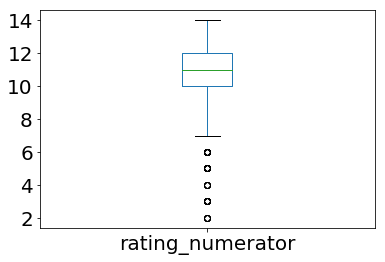

In [54]:
data.plot(y='rating_numerator',kind='box',fontsize=20);

Group data by dog type and count the number of dogs in each type

In [55]:
groupby_dog_count=data.groupby(['dog_type'])['tweet_id'].count()
groupby_dog_count.sort_values(ascending=False,inplace=True)

Bar plot to visualize the dog breed and its corresponding count of dogs

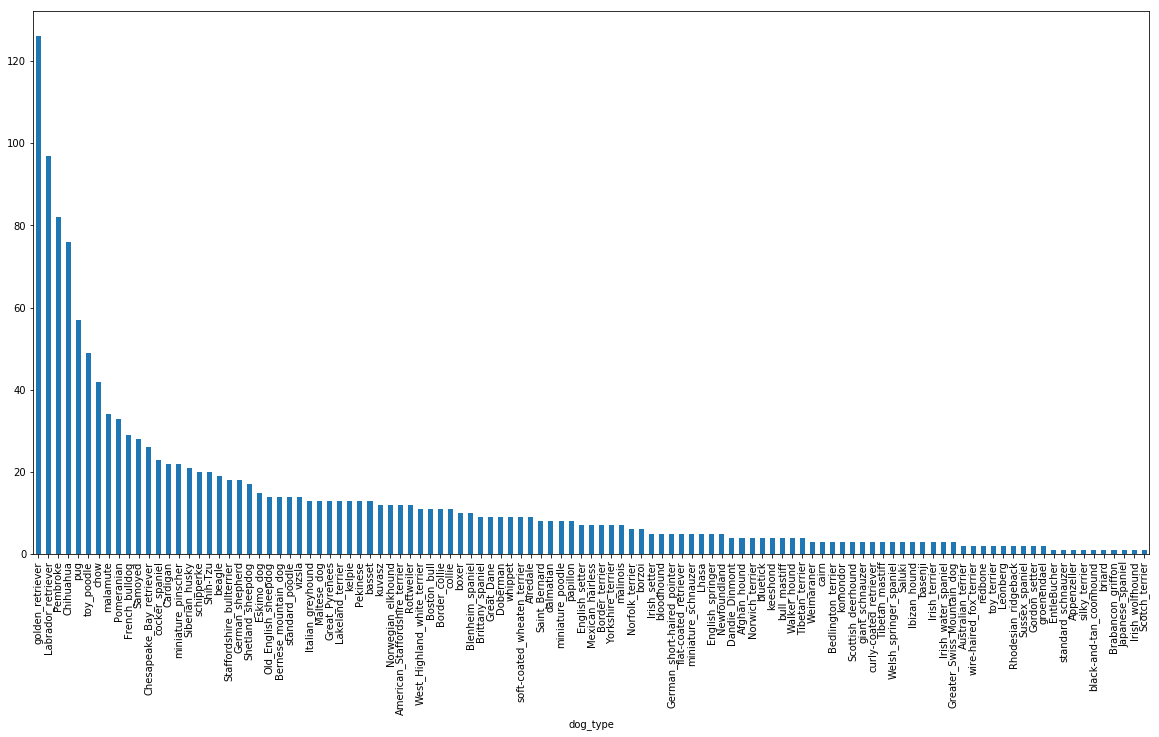

In [56]:
plt.rcParams["figure.figsize"] = (20,10)
groupby_dog_count.plot(x=groupby_dog_count.index,y=groupby_dog_count,kind='bar');

To see top 10 dog breed with highest count. As can be seen golden_retrriever has highest count of dogs

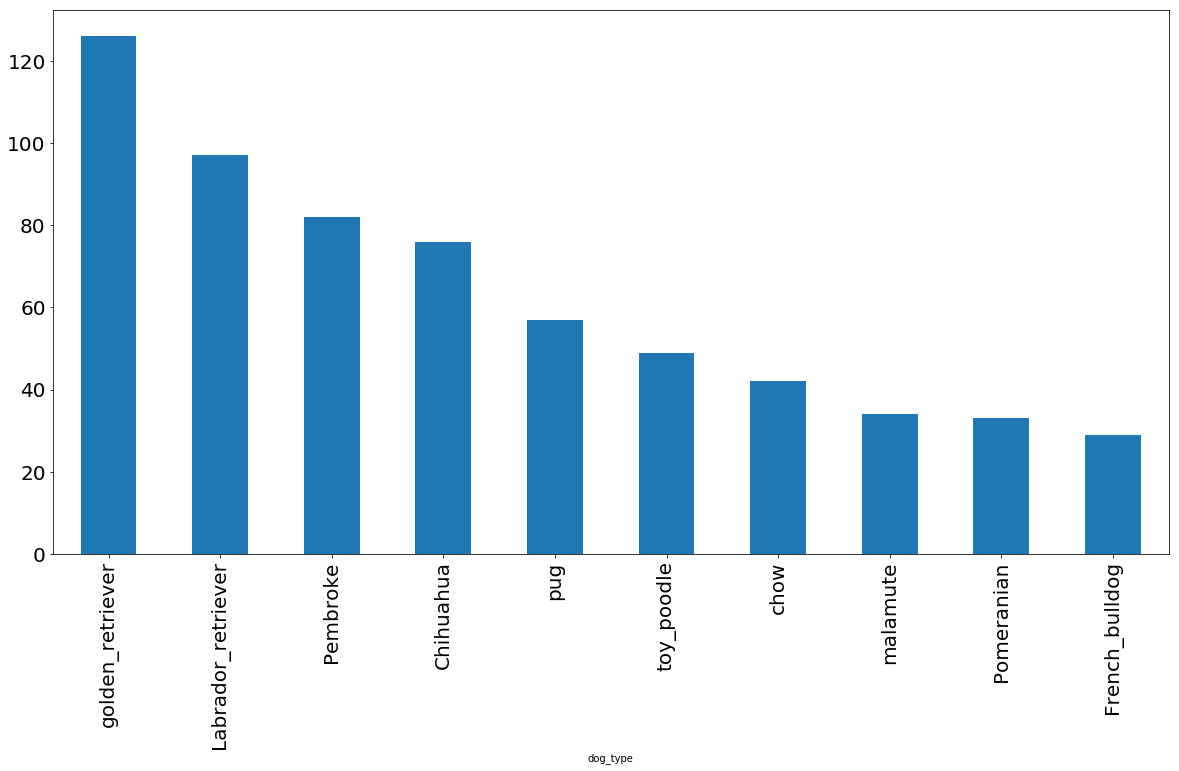

In [57]:
groupby_dog_count[:10].plot(x=groupby_dog_count.index,y=groupby_dog_count,kind='bar',fontsize=20);

Group the data by dog breed and sum its corresponding rating

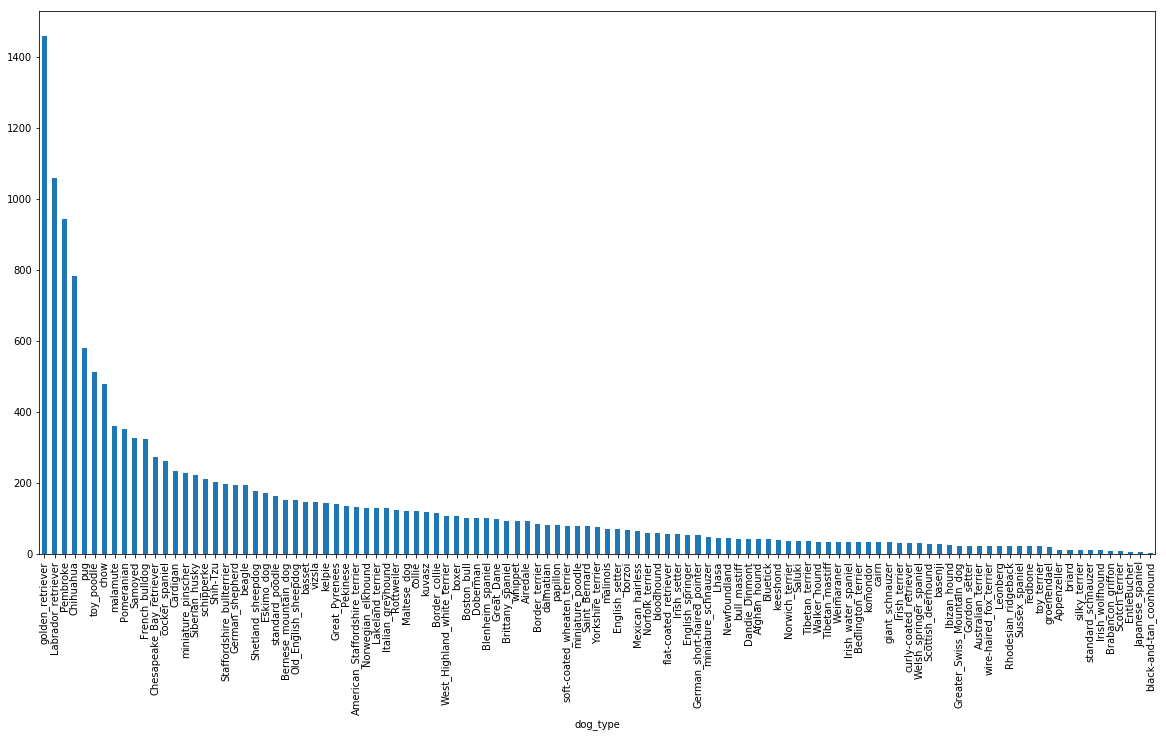

In [58]:
groupby_dog_sum_rating=data.groupby(['dog_type'])['rating_numerator'].sum()
groupby_dog_sum_rating.sort_values(ascending=False,inplace=True)
groupby_dog_sum_rating.plot(x=groupby_dog_sum_rating.index,y=groupby_dog_sum_rating,kind='bar');

Pie chart to visualize top 10 highest rated dogs. As can be seen golden_retriever has highest rating

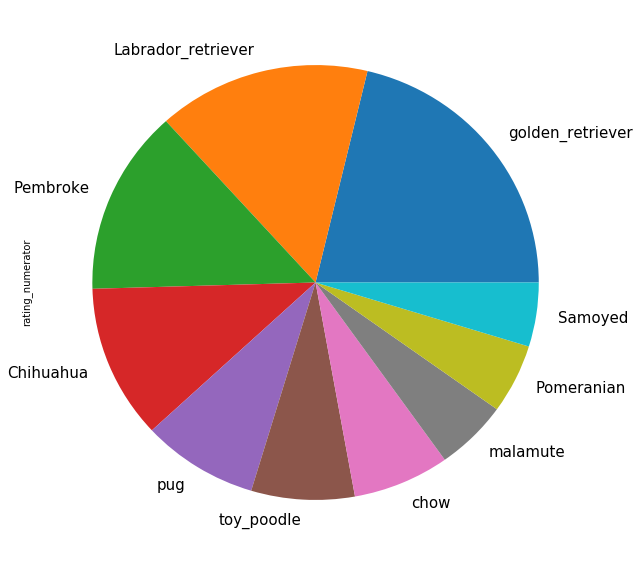

In [59]:
groupby_dog_sum_rating[:10].plot(x=groupby_dog_sum_rating.index,y=groupby_dog_sum_rating,kind='pie',figsize=[10,10],fontsize=15);

A scatter plot to see the relationship betwwen Dog rating and Count varibles. As can be seen there is a strong positive relationship. As the count increases so does the sum of dog ratings.

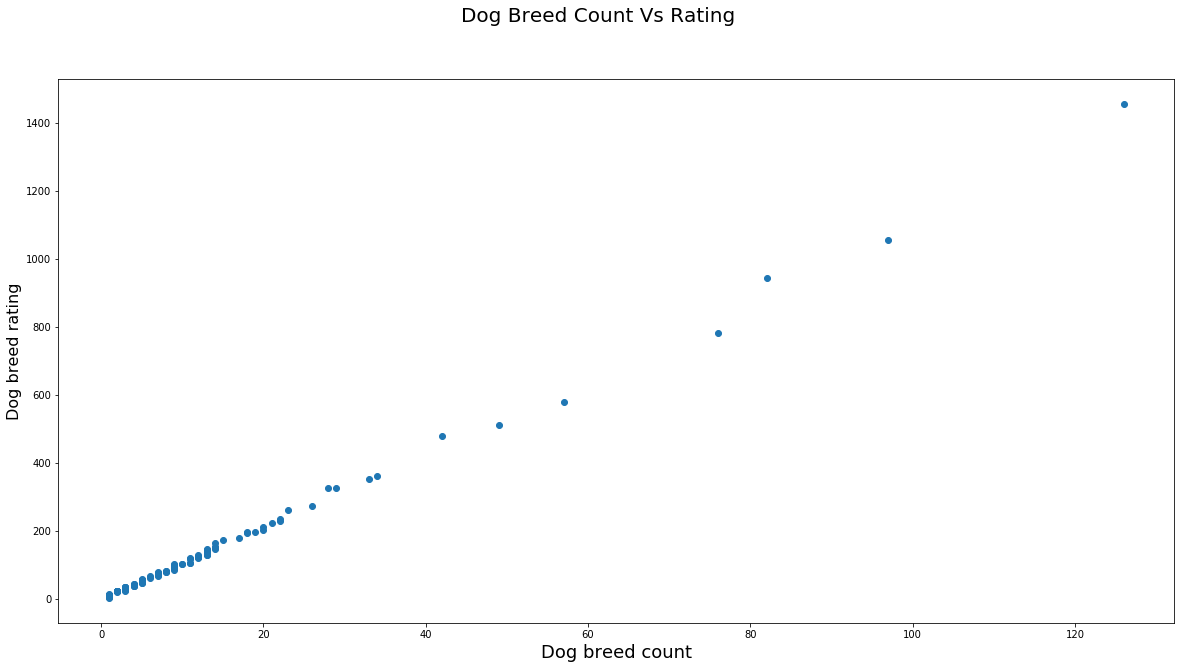

In [60]:
plt.scatter(groupby_dog_count,groupby_dog_sum_rating)
plt.suptitle('Dog Breed Count Vs Rating', fontsize=20)
plt.xlabel('Dog breed count', fontsize=18)
plt.ylabel('Dog breed rating', fontsize=16);

As there is positive relationship between count and sum rating, we should consider mean rating. 
Group data by dog type and take mean of its corresponding ratings

In [61]:
groupby_dog_mean_rating=data.groupby(['dog_type'])['rating_numerator'].mean()
groupby_dog_mean_rating.sort_values(ascending=False,inplace=True)

A bar chart to visualize all mean ratings for all dog types

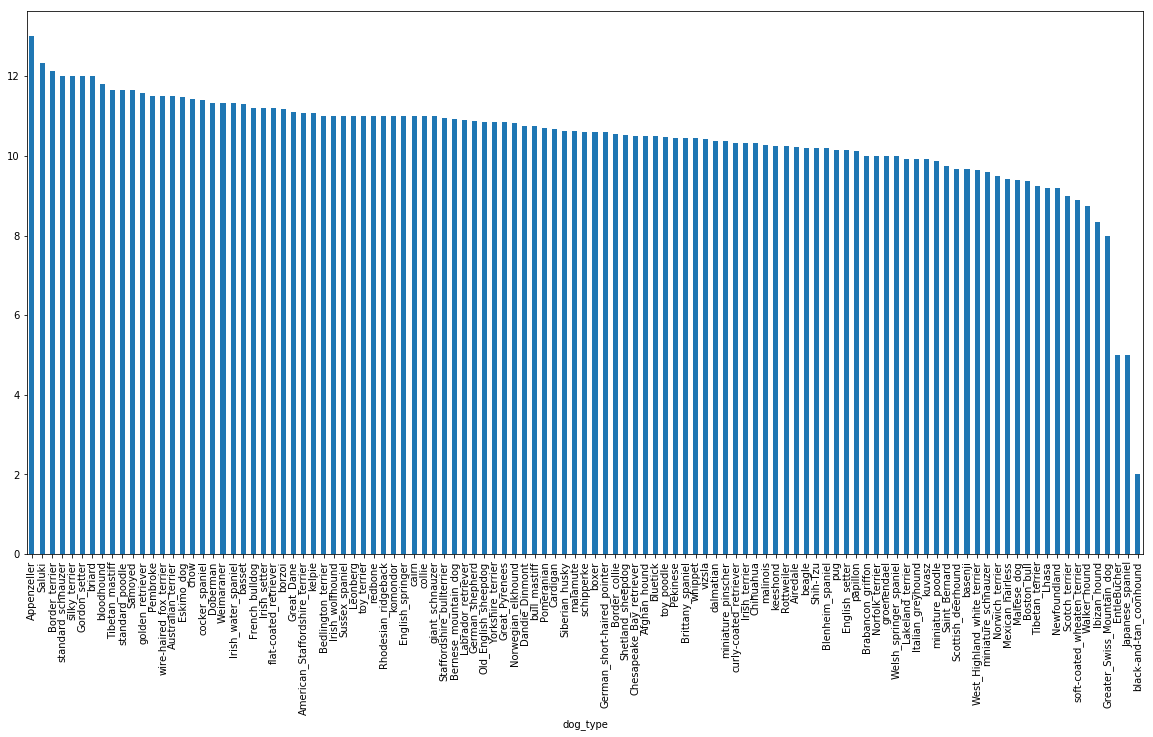

In [62]:
groupby_dog_mean_rating.plot(x=groupby_dog_mean_rating.index,y=groupby_dog_mean_rating,kind='bar');

A boxplot to visualize the minimum mean, maximum mean and average mean rating for dog type

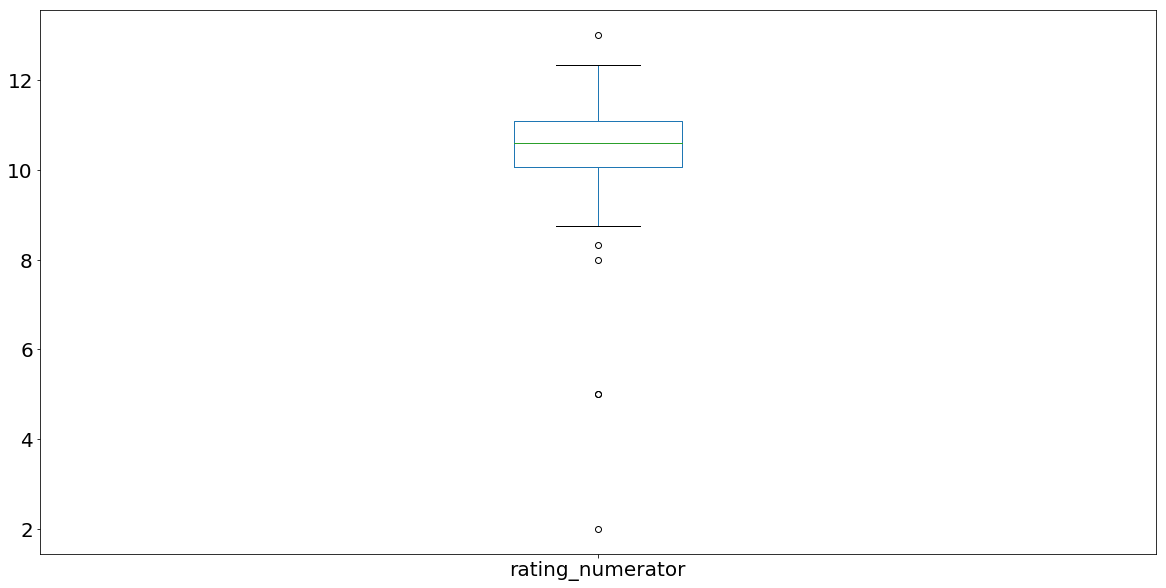

In [63]:
groupby_dog_mean_rating.plot(y=groupby_dog_mean_rating,kind='box',fontsize=20);

Group data by tweet date and count of its corresponding tweets

In [64]:
groupby_date_count=data.groupby(['date'])['tweet_id'].count()
groupby_date_count.sort_values(ascending=False,inplace=True)

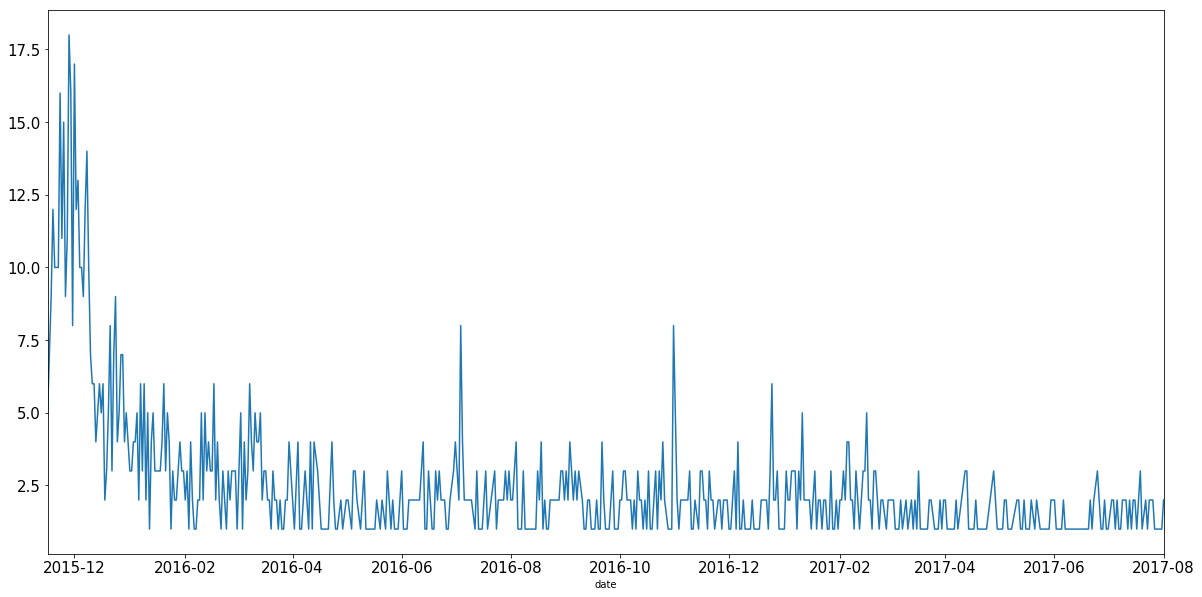

In [65]:
groupby_date_count.plot(x=groupby_date_count.index,y=groupby_date_count,kind='line',fontsize=15);

As can be seen from above highest tweets are posted during period 2015-12 to 2016-02

Group data by dog name and count of its corresponding tweets

In [66]:
groupby_dog_name_count=data.groupby(['name'])['tweet_id'].count()
groupby_dog_name_count.sort_values(ascending=False,inplace=True)

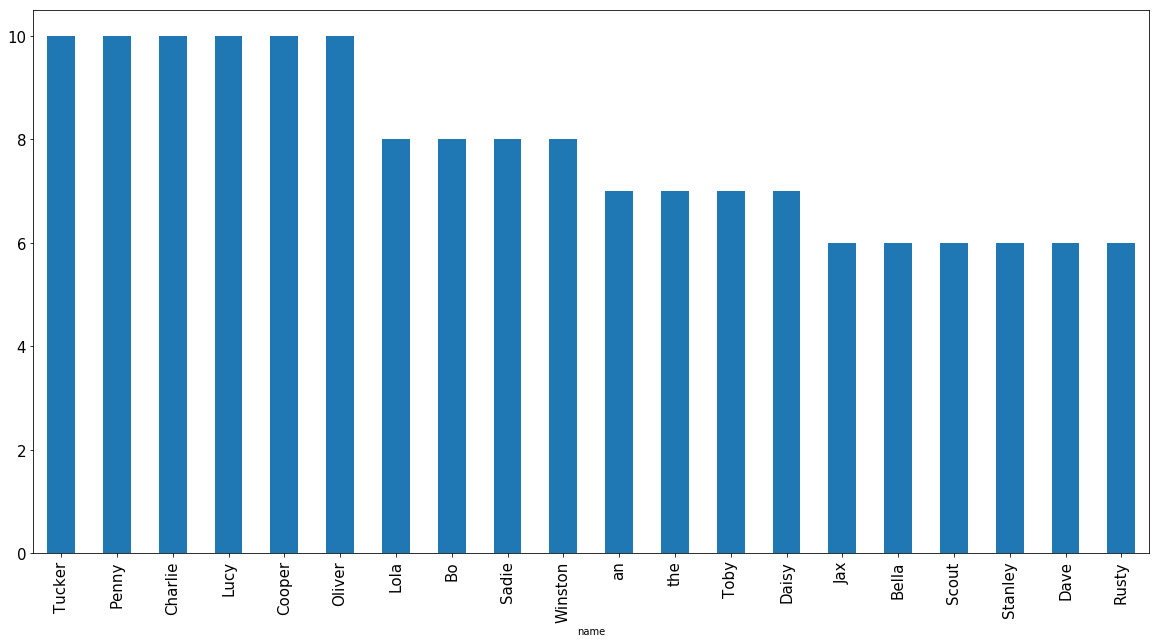

In [67]:
groupby_dog_name_count[:20].plot(x=groupby_dog_name_count.index,y=groupby_dog_name_count,kind='bar',fontsize=15);

As can be seen from above Tucker, Penny, charlie, Lucy, Cooper, Oliver are the common names given to dogs

Group data by dog name and take mean of its corresponding ratings

In [68]:
groupby_dog_name_mean=data.groupby(['name'])['rating_numerator'].mean()
groupby_dog_name_mean.sort_values(ascending=False,inplace=True)

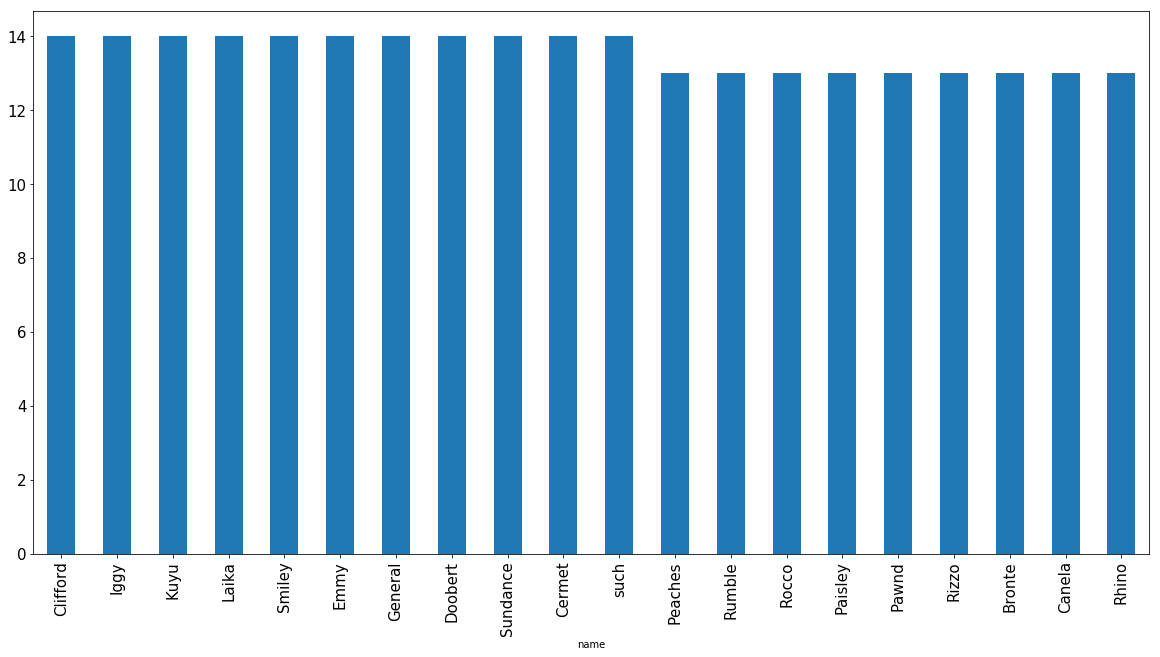

In [69]:
groupby_dog_name_mean[:20].plot(x=groupby_dog_name_mean.index,y=groupby_dog_name_mean,kind='bar',fontsize=15);

As can be seen from above the highest mean rated dog names are Clifford, lggy, kuyu, Laika, Smiley, Emmy, General,Doobert, Sundance, cerment and such